In [ ]:
from PIL import Image  # Import the Image module from Pillow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Preprocess the Data
X = X / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(np.uint8)  # Convert labels to integers

#  Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Different Classifiers

# 1. Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
logisticRegression = LogisticRegression().fit(X_train, y_train)
y_pred_logistic = logisticRegression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# --- STEP 1: Load the MLP model ---
# Create an instance of the MLPClassifier with desired settings
# (hidden_layer_sizes, activation, solver, etc.)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# --- STEP 2: Fit the model to your training data ---
mlp.fit(X_train, y_train)

# Now your model is trained and ready for predictions
# For example, to print the training accuracy:
print(f"Training accuracy: {mlp.score(X_train, y_train):.2f}")

# Make predictions on the test set and calculate accuracy
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy_mlp}")

Training accuracy: 0.97
MLP Classifier Accuracy: 0.9319285714285714


In [ ]:
# Set up the environment
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt  # Install requirements

# Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load YOLOv5s model (small)


Cloning into 'yolov5'...
remote: Enumerating objects: 17646, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 17646 (delta 13), reused 8 (delta 8), pack-reused 17601 (from 3)
Receiving objects: 100% (17646/17646), 16.99 MiB | 12.22 MiB/s, done.
Resolving deltas: 100% (11989/11989), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-10-30 Python-3.12.12 torch-2.8.0+cu126 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 177MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
pip install requests

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


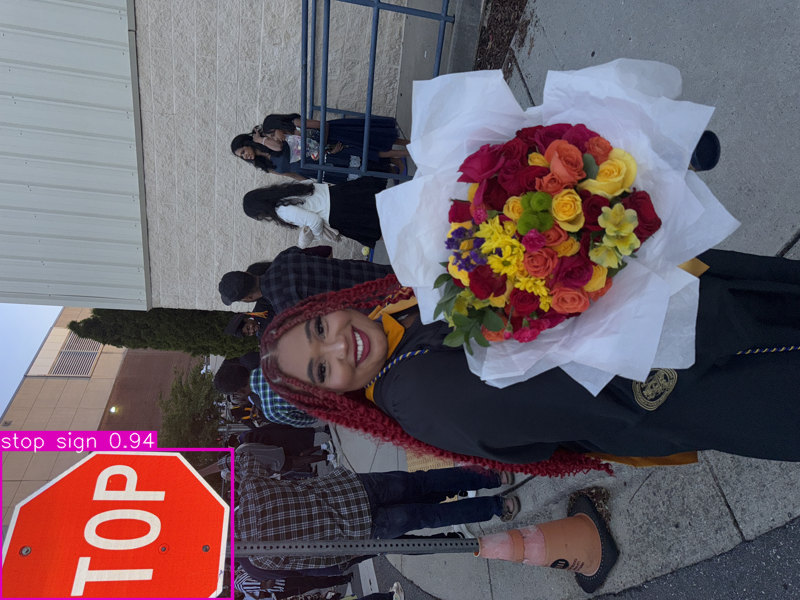

In [ ]:
img_path = '/content/IMG_5891.JPEG'  # path to your image - Please provide a valid image path here
image = Image.open(img_path)

# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()

# New Section